<a href="https://colab.research.google.com/github/lungilemngadi/generative-ai-for-beginners/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing and Selecting the kaggle.json file


In [ ]:
from google.colab import files
files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


{'CarPrice_Assignment.csv': b'car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price\r\n1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495\r\n2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500\r\n3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500\r\n4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950\r\n5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450\r\n6,2,audi fox,gas,std,two,sedan,fwd,

-Move the uploades json file to the right directory

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


-Downloading dataset:

In [ ]:
!kaggle datasets download -d hellbuoy/car-price-prediction

Dataset URL: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
License(s): unknown
  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 23.2MB/s]


-Unzipping the dataset

In [ ]:
!unzip car-price-prediction.zip


Archive:  car-price-prediction.zip
replace CarPrice_Assignment.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


-Loading data to the work space

In [ ]:
import pandas as pd
df=pd.read_csv("CarPrice_Assignment.csv")

-Check data

In [ ]:
df.head()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

1.Data Exploration

In [ ]:
df.isnull().sum()
df.describe()
df['doornumber'].value_counts()


doornumber
four    115
two      90
Name: count, dtype: int64

1.Visualisation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Car Price Distribution Plot')

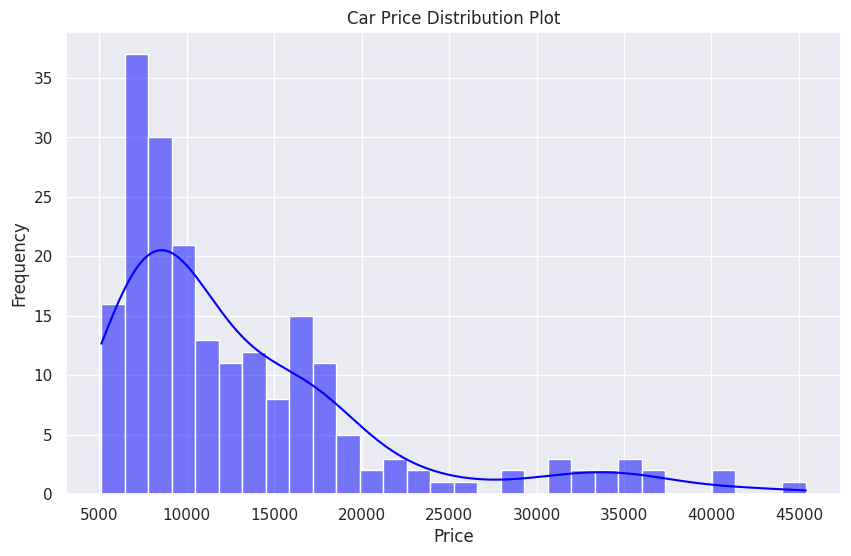

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30,kde=True ,color='blue')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Car Price Distribution Plot")

2.Boxplot of Price by body type

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Carbody', y='price', data=df ,palette='Set1')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Price Distribution by Fuel Type')
plt.show()

3.Data Processing

In [ ]:
df.drop(['CarName','car_ID'],axis=1,inplace=True)
df.columns
df.nunique()
df['doornumber'].unique()


array([0, 1])

4.Mapping Categorical Values

In [ ]:
df['doornumber']=df['doornumber'].map({'two':0,'four':1})
df['fueltype']=df['fueltype'].map({'gas':0,'diesel':1})
df['aspiration']=df['aspiration'].map({'std':0,'turbo':2})
df['cylindernumber']=df['cylindernumber'].map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
df['drivewheel']=df['drivewheel'].map({'fwd':2,'rwd':1,'4wd':3})
df['enginelocation']=df['enginelocation'].map({'front':1,'rear':2})

5.Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['enginetype']=lr.fit_transform(df['enginetype'])
df['carbody']=lr.fit_transform(df['carbody'])
df['fuelsystem']=lr.fit_transform(df['fuelsystem'])

6.Correlation Analysis

In [ ]:
df.dtypes

symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
correlation_matrix = df.corr()
correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) !=
correlation_pairs.index.get_level_values(1)]
correlation_df = pd.DataFrame({ 'Feature 1': correlation_pairs.index.get_level_values(0), 'Feature 2': correlation_pairs.index.get_level_values(1), 'Correlation': correlation_pairs.values })
filtered_correlation_df = correlation_df[correlation_df['Correlation'] > 0.7]
sorted_filtered_correlation_df = filtered_correlation_df.sort_values(by='Correlation',ascending=False)
print(sorted_filtered_correlation_df)

            Feature 1         Feature 2  Correlation
40           fueltype  compressionratio     0.984356
415  compressionratio          fueltype     0.984356
527        highwaympg           citympg     0.971337
504           citympg        highwaympg     0.971337
194         carlength        curbweight     0.877728
261        curbweight         carlength     0.877728
191         carlength         wheelbase     0.874587
168         wheelbase         carlength     0.874587
543             price        enginesize     0.874145
344        enginesize             price     0.874145
217          carwidth        curbweight     0.867032
262        curbweight          carwidth     0.867032
266        curbweight        enginesize     0.850594
333        enginesize        curbweight     0.850594
335        enginesize    cylindernumber     0.846031
312    cylindernumber        enginesize     0.846031
215          carwidth         carlength     0.841118
192         carlength          carwidth     0.

7.Linear Regression

feature selection

In [ ]:
#import libries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#specifying target viarable
targe_virable='price'

#extract features and target variable
selected_features_df = df.drop([target_variable])
x=selected_features_df
y=df[target_viaraable]



In [ ]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)
mse =

8.Visualising Th Predictions